In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from scipy.stats import mode



In [ ]:
#Select input dataset input_dataset = 1 for wine, input_dataset = 2 for MNIST
input_dataset = 2;

# --- Set the number of iterations(and steps) to execute the algorithm for --- #
iteration = 500
step = 50

# ---- Set the starting number of trees, and number of trees to increment at each iteration ---- #
B=0
stepb = 50



In [302]:

## import inputs wine, mnist dataset
fwine = open('wine.data', 'r')
wineraw = np.loadtxt("wine.data", comments="#", delimiter=",", unpack=False) #178x14
wineclass = wineraw[:,1]
winedata = wineraw[:,1:len(wineraw[2,:])]

## import MNIST Dataset
if (input_dataset == 2):
    ftrain = open('train.csv', 'r')
    ftest = open('test.csv','r')
    mnist_trainraw = np.loadtxt("train.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    mnist_testraw = np.loadtxt("test.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    mnist_raw = np.append(mnist_trainraw,mnist_testraw,axis = 1)
    mnist_raw = np.roll(np.transpose(mnist_raw),1,axis=1)
print('done')

done


In [303]:
if (input_dataset == 1):
    train, test = train_test_split(wineraw, train_size = 0.75)
elif (input_dataset == 2):
    train = np.roll(np.transpose(mnist_trainraw),1,axis=1)
    test = np.roll(np.transpose(mnist_testraw),1,axis=1)
    train[:,0] = train[:,0]
    test[:,0] = test[:,0]
    #train, test = train_test_split(winedata, train_size = 0.75)
print('done')

done


In [312]:
### ------------- Training data ---------------###
oob_error = np.zeros(iteration)
train_error = np.zeros(iteration)
test_error = np.zeros(iteration)

oob_error_depth5 = np.zeros(iteration)
train_error_depth5 = np.zeros(iteration)
test_error_depth5 = np.zeros(iteration)

In [313]:

for i in range(0,iteration,step):
    print(i)
    B = B+stepb
    if (i != 0):
        temp = np.zeros([test.shape[0],stepb])
        temp2 = np.zeros([test.shape[0]])
        test_predicted_matrix = np.hstack((test_predicted_matrix,temp))
        test_predicted_matrix_depth5 = np.hstack((test_predicted_matrix_depth5,temp))
        test_class_assigned = temp2
        test_class_assigned_depth5 = temp2
        
        temp = np.zeros([train.shape[0],stepb])  
        temp2 = np.zeros([train.shape[0]])
        bootstrap_predicted_matrix = np.hstack((bootstrap_predicted_matrix,temp))
        bootstrap_predicted_matrix_depth5 = np.hstack((bootstrap_predicted_matrix_depth5,temp))
        oob_predicted_matrix = np.hstack((oob_predicted_matrix,temp))
        oob_predicted_matrix_depth5 = np.hstack((oob_predicted_matrix_depth5,temp))

        bootstrap_index_mat = np.hstack((bootstrap_index_mat,temp))
        
        train_class_assigned = temp2
        train_class_assigned_depth5 = temp2
        oob_class_assigned = temp2
        oob_class_assigned_depth5 = temp2   

    elif (i == 0):
        test_predicted_matrix = np.zeros([test.shape[0],B])
        bootstrap_predicted_matrix = np.zeros([train.shape[0],B])
        oob_predicted_matrix = np.zeros([train.shape[0],B])

        test_predicted_matrix_depth5 = np.zeros([test.shape[0],B])
        bootstrap_predicted_matrix_depth5 = np.zeros([train.shape[0],B])
        oob_predicted_matrix_depth5 = np.zeros([train.shape[0],B])

        bootstrap_index_mat = np.zeros([train.shape[0],B])

        train_class_assigned = np.zeros([train.shape[0]])
        oob_class_assigned = np.zeros([train.shape[0]])
        test_class_assigned = np.zeros([test.shape[0]])

        train_class_assigned_depth5 = np.zeros([train.shape[0]])
        oob_class_assigned_depth5 = np.zeros([train.shape[0]])
        test_class_assigned_depth5 = np.zeros([test.shape[0]])    

    if (i == 0):
        stepbb = B
    else:
         stepbb = stepb    
    for bb in range(stepbb):
        if (i != 0):
            b = B-stepb+bb
        elif (i == 0):
            b = bb;
        #Full Tree
        index_bootstrap = np.random.choice(train.shape[0],size = train.shape[0], replace = True)
        bootstrap_index_mat[:,b] = index_bootstrap
        bootstrap_sample = train[index_bootstrap,:]
        #out of bag samples
        index_oob = list(set(range(train.shape[0])) - set(index_bootstrap))
        sample_oob = train[index_oob,:]
        #Fitting Decision tree
        tree_classifier = tree.DecisionTreeClassifier(max_features= "sqrt")
        tree_classifier = tree_classifier.fit(bootstrap_sample[:,1:],bootstrap_sample[:,0])
        #Predicting out of bag samples classes
        oob_predicted_matrix[index_oob,b] = tree_classifier.predict(sample_oob[:,1:])
        test_predicted_matrix[:,b] = tree_classifier.predict(test[:,1:])
        bootstrap_predicted_matrix[:,b] = tree_classifier.predict(train[:,1:])

        #Tree of Depth = 5
        #Fitting Decision tree
        tree_classifier_depth5 = tree.DecisionTreeClassifier(max_features= "sqrt",max_depth = 5)
        tree_classifier_depth5 = tree_classifier_depth5.fit(bootstrap_sample[:,1:],bootstrap_sample[:,0])
        #Predicting out of bag samples classes
        oob_predicted_matrix_depth5[index_oob,b] = tree_classifier_depth5.predict(sample_oob[:,1:])
        test_predicted_matrix_depth5[:,b] = tree_classifier_depth5.predict(test[:,1:])
        bootstrap_predicted_matrix_depth5[:,b] = tree_classifier_depth5.predict(train[:,1:])

    for j in range(train.shape[0]):
        #train_class_assigned[j] = mode(bootstrap_predicted_matrix[np.where(bootstrap_index_mat[:,b]==j)])[0]
        #train_class_assigned_depth5[j] = mode(bootstrap_predicted_matrix_depth5[np.where(bootstrap_index_mat[:,b]==j)])[0]
        
        a=([np.where(oob_predicted_matrix[j,:]>0)])  
        if ((np.shape(a))[2] != 0):
             oob_class_assigned[j] = mode((oob_predicted_matrix[j,a])[0,0])[0]
        a=([np.where(oob_predicted_matrix_depth5[j,:]>0)])
        if ((np.shape(a))[2] != 0):
            oob_class_assigned_depth5[j] = mode((oob_predicted_matrix_depth5[j,a])[0,0])[0]
        #oob_class_assigned_depth5 = mode(oob_predicted_matrix_depth5,axis = 1)[0]

    train_class_assigned = mode(bootstrap_predicted_matrix[:,0:b+1],axis = 1)[0]
    train_class_assigned_depth5 = mode(bootstrap_predicted_matrix_depth5[:,0:b+1],axis = 1)[0]
    
    test_class_assigned = mode(test_predicted_matrix[:,0:b+1],axis = 1)[0]
    test_class_assigned_depth5 = mode(test_predicted_matrix_depth5[:,0:b+1],axis = 1)[0]
    
    oob_error[i] = accuracy_score(train[:,0], oob_class_assigned)
    train_error[i] = accuracy_score(train[:,0], train_class_assigned)
    test_error[i] = accuracy_score(test[:,0], test_class_assigned)

    oob_error_depth5[i] = accuracy_score(train[:,0], oob_class_assigned_depth5)
    train_error_depth5[i] = accuracy_score(train[:,0], train_class_assigned_depth5)
    test_error_depth5[i] = accuracy_score(test[:,0], test_class_assigned_depth5)
    

print('done')


0
50
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.

In [314]:
print('Train Set\n')
print('Confusion Matrix using Full tree')
print(confusion_matrix(train[:,0],train_class_assigned))
print('Final Accuracy Score = ',max(train_error))
print('\nConfusion Matrix using Depth 5 Decision Tree ')
print(confusion_matrix(train[:,0],train_class_assigned_depth5))
print('Final Accuracy Score = ',max(train_error_depth5))

print('--------------------')
print('\nTest Set\n')
print('Confusion Matrix using Full tree')
print(confusion_matrix(test[:,0],test_class_assigned))
print('Final Accuracy Score = ',max(test_error))
print('\nTest Set Confusion Matrix using Depth 5 Decision Tree ')
print(confusion_matrix(test[:,0],test_class_assigned_depth5))
print('Final Accuracy Score = ',max(test_error_depth5))

print('--------------------')
print('\nOOB Set\n')
print('Confusion Matrix using Full tree')
print(confusion_matrix(train[:,0],oob_class_assigned))
print('Final Accuracy Score = ',max(oob_error))
print('\nConfusion Matrix using Depth 5 Decision Tree ')
print(confusion_matrix(train[:,0],oob_class_assigned_depth5))
print('Final Accuracy Score = ',max(oob_error_depth5))

Train Set

Confusion Matrix using Full tree
[[5923    0    0    0]
 [   0 6742    0    0]
 [   0    0 6131    0]
 [   0    0    0 5421]]
Final Accuracy Score =  1.0

Confusion Matrix using Depth 5 Decision Tree 
[[5770    2   81   70]
 [   2 6593   75   72]
 [  28  118 5750  235]
 [  61   78  234 5048]]
Final Accuracy Score =  0.956559441714
--------------------

Test Set

Confusion Matrix using Full tree
[[ 976    0    0    4]
 [   0 1127    6    2]
 [   0    0 1002    8]
 [   4    2   10  876]]
Final Accuracy Score =  0.991784914115

Test Set Confusion Matrix using Depth 5 Decision Tree 
[[ 964    0    5   11]
 [   0 1119   11    5]
 [   8    5  967   30]
 [  11   13   51  817]]
Final Accuracy Score =  0.962658700523
--------------------

OOB Set

Confusion Matrix using Full tree
[[ 740   71 1375 3737]
 [   0 6593   77   72]
 [   0  123 5734  274]
 [   0   83  292 5046]]
Final Accuracy Score =  0.900317958459

Confusion Matrix using Depth 5 Decision Tree 
[[ 740   71 1375 3737]
 [   

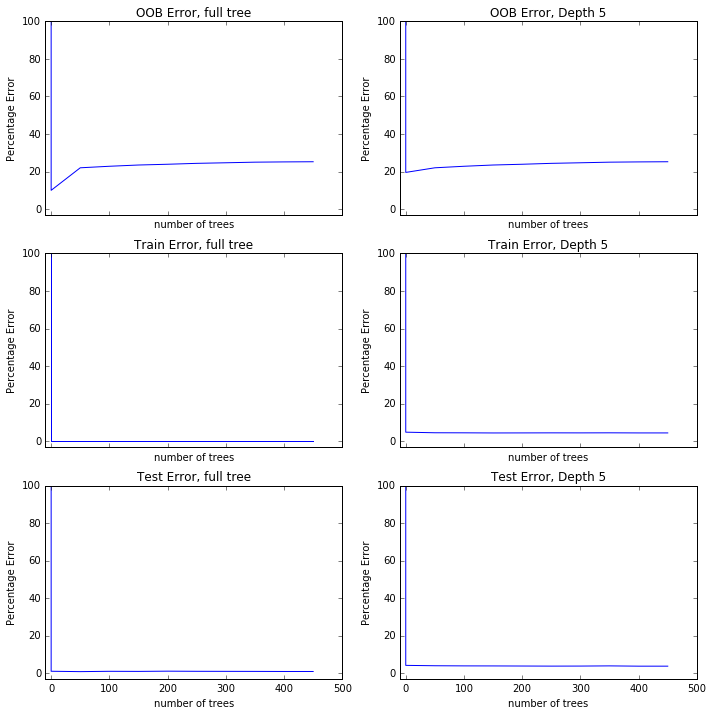

done


In [315]:
#Figure 1
ax = np.arange(0,iteration,step)
ax = np.concatenate([[0],ax])

f1, arr = plt.subplots(figsize=(10, 10), nrows=3, ncols=2,sharex = True)
#f1, arr = plt.subplots(3, figsize=(10, 10),sharex = True)
oob_error = oob_error[oob_error>0]
arr[0,0].plot(ax, (1-np.concatenate([[0],oob_error]))*100)
arr[0,0].set_title('OOB Error, full tree')

train_error = train_error[train_error>0]
arr[1,0].plot(ax,(1-np.concatenate([[0],train_error]))*100)
arr[1,0].set_title('Train Error, full tree')

test_error = test_error[test_error>0]
arr[2,0].plot(ax,(1-np.concatenate([[0],test_error]))*100)
arr[2,0].set_title('Test Error, full tree')

oob_error_depth5 = oob_error_depth5[oob_error_depth5>0]
arr[0,1].plot(ax,(1-np.concatenate([[0],oob_error_depth5]))*100)
arr[0,1].set_title('OOB Error, Depth 5')

train_error_depth5 = train_error_depth5[train_error_depth5>0]
arr[1,1].plot(ax,(1-np.concatenate([[0],train_error_depth5]))*100)
arr[1,1].set_title('Train Error, Depth 5')

test_error_depth5 = test_error_depth5[test_error_depth5>0]
arr[2,1].plot(ax,(1-np.concatenate([[0],test_error_depth5]))*100)
arr[2,1].set_title('Test Error, Depth 5')

for i in range(3):
    for j in range(2):
        arr[i,j].set_xlabel('number of trees')
        arr[i,j].set_ylabel('Percentage Error')
        arr[i,j].set_xlim(-10,iteration)
        arr[i,j].set_ylim(-3,100)

plt.tight_layout()
plt.show()
print('done')
